# Temat testów - grafiki B: mapa vs tabela vs tekst vs wykres

SUMY:

– Czy istnieje istotna statystycznie różnica w sumie całkowitych długości fiksacji/wizyt między poszczególnymi formami prezentacji danych?
– Czy istnieje istotna statystycznie różnica w sumie średnich długości fiksacji/wizyt między poszczególnymi formami prezentacji danych?
– Czy istnieje istotna statystycznie różnica w sumie liczb fiksacji/wizyt między poszczególnymi formami prezentacji danych? 

POSZCZEGÓLNE DANE:

– Czy istnieje istotna statystycznie różnica w całkowitej długości fiksacji/wizyt między poszczególnymi formami prezentacji danych?
– Czy istnieje istotna statystycznie różnica w średniej długości fiksacji/wizyt między poszczególnymi formami prezentacji danych?
– Czy istnieje istotna statystycznie różnica w średniej wielkości źrenicy między poszczególnymi formami prezentacji danych?
– Czy istnieje istotna statystycznie różnica w liczbie fiksacji/wizyt między poszczególnymi formami prezentacji danych? 

ŚREDNIE:

– Czy istnieje istotna statystycznie różnica w średniej całkowitych długości fiksacji/wizyt między poszczególnymi formami prezentacji danych?
– Czy istnieje istotna statystycznie różnica w średniej średnich długości fiksacji/wizyt między poszczególnymi formami prezentacji danych?
– Czy istnieje istotna statystycznie różnica w średniej średnich wielkości źrenicy między poszczególnymi formami prezentacji danych?
– Czy istnieje istotna statystycznie różnica w średniej liczbie fiksacji/wizyt między poszczególnymi formami prezentacji danych?


In [231]:
import pandas as pd

from functions.tests.multivariate_analysis import anova
from functions.plots import plot_multi_boxplot, plot_multi_density
from functions.tests.posthoc import anova_posthoc

In [232]:
df = pd.read_csv('/Users/martasolarz/Studies/Thesis/Master_thesis/prepare_datasets/sets/map_tab_plt_txt.csv', index_col='idx')
df.sample(2)

,ID,Total_fix_1,Avg_fix_1,Num_fix_1,Avg_pupil_1,Total_visit_1,Avg_visit_1,Num_visit_1,Total_fix_2,Avg_fix_2,...,Avg_Total_visit,Sum_Avg_fix,Avg_Avg_fix,Sum_Avg_visit,Avg_Avg_visit,Sum_Num_fix,Avg_Num_fix,Sum_Num_visit,Avg_Num_visit,Avg_AvgPupil
idx,,,,,,,,,,,,,,,,,,,,,
119,2,6725,240.0,28,2.94619,8751,1250.0,7,4058,162.0,...,9125.5,649.0,324.5,4483.0,2241.5,69,34.5,14,7.0,2.892933
20,41,1517,190.0,8,3.02839,1908,636.0,3,4741,216.0,...,13390.5,631.0,315.5,3750.0,1875.0,91,45.5,18,9.0,2.992673


In [233]:
ALPHA = 0.05


In [234]:
results = []
def test(data, columns, flag=True, results=results):
    for col in columns:
        results.append('\n')
        results.append(col)
        print('#################################')
        print(col)
        if flag:
            data_copy = data.fillna(0)
        else:
            data_copy = data.copy()
        p = anova(data_copy, col, ['Group'], 'ID', ALPHA)
        results.extend(p)
        
def plots(data, columns, label=''):
    df = data.copy()
    for col in columns:
        if col.startswith('Total') or col.startswith('Sum_Total') or col.startswith('Avg_Total'):
            lab = f'Całkowity czas {label} [s]'
            df[col] = df[col] / 1000
        elif col.startswith('Avg') or col.startswith('Sum_Avg') or col.startswith('Avg_Avg'):
            lab = f'Średni czas  {label} [s]'
            df[col] = df[col] / 1000
        elif col.startswith('Num') or col.startswith('Sum_Num') or col.startswith('Avg_Num'):
            lab = f'Liczba {label}'
        # plot_multi_density(data, col, 'Group', col, 'Grupa')
        plot_multi_boxplot(df, 'Group', col, '', lab, '')
        
        
def posthoc_tests(df, columns):
    for col in columns:
        print('#################################')
        print(col)
        anova_posthoc(df, col, 'Group', 'ID')

In [235]:
fixations = df.filter(regex='.*fix.*').columns
visits = df.filter(regex='.*visit.*').columns

### Analiza wartości odstających

In [236]:
df.filter(regex='.*pupil.*').describe([.75, .9, .95, .99, .999]).T

,count,mean,std,min,50%,75%,90%,95%,99%,99.9%,max
Avg_pupil_1,141.0,3.416394,0.438379,2.68364,3.35424,3.74963,4.076160,4.216680,4.454400,4.486297,4.48699
Avg_pupil_2,153.0,3.413406,0.438701,2.70799,3.36283,3.68014,4.008874,4.275562,4.508463,4.586104,4.59915
Avg_pupil_3,153.0,3.334845,0.416731,2.63962,3.29306,3.62817,3.861874,4.140084,4.350662,4.380160,4.38166


In [237]:
df.filter(regex='.*pupil.*').median()

Avg_pupil_1    3.35424
Avg_pupil_2    3.36283
Avg_pupil_3    3.29306
dtype: float64

In [238]:
df.filter(regex='Total.*').describe([.75, .9, .95, .99, .999]).T

,count,mean,std,min,50%,75%,90%,95%,99%,99.9%,max
Total_fix_1,160.0,7371.168750,10378.888974,0.0,3092.00,10160.000,18253.10,29716.15,48565.740,57294.4670,58787.0
Total_visit_1,160.0,9796.237500,12862.922321,0.0,5237.00,13792.500,23604.70,39290.10,56992.100,66447.5930,67286.0
Total_fix_2,160.0,7990.206250,9848.588394,0.0,4341.00,9699.000,20778.40,30453.80,44049.690,51988.7900,52496.0
Total_visit_2,160.0,11002.275000,13142.518800,0.0,6166.50,14471.250,32393.60,41565.80,54191.860,65663.5990,66433.0
Total_fix_3,160.0,11317.393750,11586.486423,0.0,7807.50,15623.250,26100.50,31381.55,51745.040,70309.4390,73502.0
Total_visit_3,160.0,15078.612500,14362.943484,0.0,11618.00,20867.500,32605.30,42009.75,62326.520,80151.2130,82710.0
Sum_Total_fix,160.0,26678.768750,22139.078219,550.0,21121.50,35983.250,55495.10,67413.00,102440.780,133511.5190,138275.0
Avg_Total_fix,160.0,13339.384375,11069.539109,275.0,10560.75,17991.625,27747.55,33706.50,51220.390,66755.7595,69137.5
Sum_Total_visit,160.0,35877.125000,27322.949501,575.0,30460.50,48195.500,70824.70,86588.60,121174.850,165452.6570,172922.0
Avg_Total_visit,160.0,17938.562500,13661.474751,287.5,15230.25,24097.750,35412.35,43294.30,60587.425,82726.3285,86461.0


In [239]:
df.filter(regex='Total.*').median()

Total_fix_1         3092.00
Total_visit_1       5237.00
Total_fix_2         4341.00
Total_visit_2       6166.50
Total_fix_3         7807.50
Total_visit_3      11618.00
Sum_Total_fix      21121.50
Avg_Total_fix      10560.75
Sum_Total_visit    30460.50
Avg_Total_visit    15230.25
dtype: float64

In [240]:
for column in df.filter(regex='Total.*').columns:
    if pd.api.types.is_numeric_dtype(df[column]):
        percentile_99 = df[column].quantile(0.99)
        records_above_99_percentile = df[df[column] > percentile_99]
        print(f"Liczba rekordów w kolumnie '{column}', które są większe niż 99% wartości: {len(records_above_99_percentile), list(records_above_99_percentile.ID)}")

Liczba rekordów w kolumnie 'Total_fix_1', które są większe niż 99% wartości: (2, [7, 20])
Liczba rekordów w kolumnie 'Total_visit_1', które są większe niż 99% wartości: (2, [7, 20])
Liczba rekordów w kolumnie 'Total_fix_2', które są większe niż 99% wartości: (2, [15, 2])
Liczba rekordów w kolumnie 'Total_visit_2', które są większe niż 99% wartości: (2, [15, 2])
Liczba rekordów w kolumnie 'Total_fix_3', które są większe niż 99% wartości: (2, [19, 2])
Liczba rekordów w kolumnie 'Total_visit_3', które są większe niż 99% wartości: (2, [19, 2])
Liczba rekordów w kolumnie 'Sum_Total_fix', które są większe niż 99% wartości: (2, [29, 2])
Liczba rekordów w kolumnie 'Avg_Total_fix', które są większe niż 99% wartości: (2, [29, 2])
Liczba rekordów w kolumnie 'Sum_Total_visit', które są większe niż 99% wartości: (2, [29, 2])
Liczba rekordów w kolumnie 'Avg_Total_visit', które są większe niż 99% wartości: (2, [29, 2])


In [241]:
df.filter(regex='Avg_(?!pupil).*').describe([.75, .9, .95, .99, .999]).T

,count,mean,std,min,50%,75%,90%,95%,99%,99.9%,max
Avg_fix_1,141.0,187.042553,49.544046,75.000000,186.000000,225.000000,246.000000,265.000000,285.400000,325.700000,332.000000
Avg_visit_1,141.0,2572.226950,3373.798200,92.000000,1320.000000,4013.000000,5816.000000,6783.000000,16732.000000,23599.480000,24344.000000
Avg_fix_2,153.0,181.143791,43.724379,99.000000,178.000000,214.000000,239.200000,251.400000,277.400000,321.552000,329.000000
Avg_visit_2,153.0,2030.470588,2420.900833,108.000000,1326.000000,2452.000000,4197.400000,5715.400000,12866.080000,16875.968000,16924.000000
Avg_fix_3,153.0,186.143791,45.003277,79.000000,189.000000,215.000000,242.600000,259.400000,290.880000,302.480000,304.000000
Avg_visit_3,153.0,2631.071895,2711.385185,79.000000,1938.000000,3022.000000,5267.400000,9085.800000,12237.000000,15297.824000,15695.000000
Avg_Total_fix,160.0,13339.384375,11069.539109,275.000000,10560.750000,17991.625000,27747.550000,33706.500000,51220.390000,66755.759500,69137.500000
Avg_Total_visit,160.0,17938.562500,13661.474751,287.500000,15230.250000,24097.750000,35412.350000,43294.300000,60587.425000,82726.328500,86461.000000
Sum_Avg_fix,160.0,516.050000,141.948560,155.000000,529.000000,617.750000,690.600000,737.050000,786.050000,789.841000,790.000000
Avg_Avg_fix,160.0,269.137500,58.804930,128.000000,272.250000,310.625000,345.300000,368.525000,393.025000,394.920500,395.000000


In [242]:
df.filter(regex='Avg_(?!pupil).*').median()

Avg_fix_1            186.000000
Avg_visit_1         1320.000000
Avg_fix_2            178.000000
Avg_visit_2         1326.000000
Avg_fix_3            189.000000
Avg_visit_3         1938.000000
Avg_Total_fix      10560.750000
Avg_Total_visit    15230.250000
Sum_Avg_fix          529.000000
Avg_Avg_fix          272.250000
Sum_Avg_visit       5338.000000
Avg_Avg_visit       2731.166667
Avg_Num_fix           58.500000
Avg_Num_visit          7.500000
Avg_AvgPupil           3.354507
dtype: float64

In [243]:
df.filter(regex='Num.*').describe([.75, .9, .95, .99, .999]).T

,count,mean,std,min,50%,75%,90%,95%,99%,99.9%,max
Num_fix_1,160.0,35.687500,45.413431,0.0,18.5,56.25,88.2,140.000,201.58,233.2510,235.0
Num_visit_1,160.0,3.975000,3.315582,0.0,3.0,6.00,9.0,10.000,13.00,13.8410,14.0
Num_fix_2,160.0,41.925000,48.354112,0.0,25.5,55.00,110.3,148.700,206.27,249.1380,252.0
Num_visit_2,160.0,5.506250,3.938197,0.0,5.0,7.00,12.0,13.000,17.05,21.6820,22.0
Num_fix_3,160.0,57.212500,52.549035,0.0,45.0,80.00,122.1,145.600,233.56,255.6150,258.0
Num_visit_3,160.0,6.837500,5.958861,0.0,6.0,10.00,14.0,16.000,29.33,38.6820,39.0
Sum_Num_fix,160.0,134.825000,98.182000,3.0,117.0,183.00,253.2,311.050,416.76,588.5390,617.0
Avg_Num_fix,160.0,67.412500,49.091000,1.5,58.5,91.50,126.6,155.525,208.38,294.2695,308.5
Sum_Num_visit,160.0,16.318750,8.714458,2.0,15.0,21.00,27.0,31.050,44.64,51.2050,52.0
Avg_Num_visit,160.0,8.159375,4.357229,1.0,7.5,10.50,13.5,15.525,22.32,25.6025,26.0


In [244]:
df.filter(regex='Num.*').median()

Num_fix_1         18.5
Num_visit_1        3.0
Num_fix_2         25.5
Num_visit_2        5.0
Num_fix_3         45.0
Num_visit_3        6.0
Sum_Num_fix      117.0
Avg_Num_fix       58.5
Sum_Num_visit     15.0
Avg_Num_visit      7.5
dtype: float64

In [245]:
for column in df.filter(regex='Num_fix.*').columns:
    if pd.api.types.is_numeric_dtype(df[column]):
        percentile_99 = df[column].quantile(0.99)
        records_above_99_percentile = df[df[column] > percentile_99]
        print(f"Liczba rekordów w kolumnie '{column}', które są większe niż 99% wartości: {len(records_above_99_percentile), list(records_above_99_percentile.ID)}")

Liczba rekordów w kolumnie 'Num_fix_1', które są większe niż 99% wartości: (2, [7, 20])
Liczba rekordów w kolumnie 'Num_fix_2', które są większe niż 99% wartości: (2, [15, 2])
Liczba rekordów w kolumnie 'Num_fix_3', które są większe niż 99% wartości: (2, [19, 2])
Liczba rekordów w kolumnie 'Sum_Num_fix', które są większe niż 99% wartości: (2, [29, 2])
Liczba rekordów w kolumnie 'Avg_Num_fix', które są większe niż 99% wartości: (2, [29, 2])


Wartości odstające wyjaśnienia:
- wielkość źrenicy: w normie (brak błędów, nie ma potrzeby odrzucać)
- całkowita długość fiksacji/wizyt: do sprawdzenia: 2, 7, 15, 19, 20, 29 
- średnia długość fiksacji/wizyt: mediany i średnie zbliżone - nie ma potrzeby odrzucać wartości odstających, są to poprawne wartości
- liczba fiksacji: do sprawdzenia: 2, 7, 15, 19, 20, 29
- liczba wizyt: mediany i średnie zbliżone, nie ma potrzeby odrzucać wartości odstających

Sprawdzenie:
2 - 94%
7 - 95%
15 - 92%
19 - 97%
20 - 93%
29 - 97%
Wniosek: dane legit, nie odrzucamy wartości odstających!

### TESTY

In [246]:
# fiksacje
test(df, fixations)

#################################
Total_fix_1
       F Value  Num DF  Den DF    Pr > F
Group  4.78925     3.0   117.0  0.003489
-------------------
Zmienna: Group, P-value: 0.0034889053
Istnieją podstawy do odrzucenia H0, przyjmujemy hipotezę H1.
#################################
Avg_fix_1
        F Value  Num DF  Den DF   Pr > F
Group  8.105871     3.0   117.0  0.00006
-------------------
Zmienna: Group, P-value: 0.0000596570
Istnieją podstawy do odrzucenia H0, przyjmujemy hipotezę H1.
#################################
Num_fix_1
        F Value  Num DF  Den DF    Pr > F
Group  4.295674     3.0   117.0  0.006492
-------------------
Zmienna: Group, P-value: 0.0064918927
Istnieją podstawy do odrzucenia H0, przyjmujemy hipotezę H1.
#################################
Total_fix_2
        F Value  Num DF  Den DF    Pr > F
Group  2.053489     3.0   117.0  0.110197
-------------------
Zmienna: Group, P-value: 0.1101974483
Brak podstaw do odrzucenia H0.
#################################
Avg_fix_

In [247]:
posthoc_tests(df, ['Avg_fix_1', 'Avg_fix_2', 'Avg_fix_3'])

#################################
Avg_fix_1
-----------------------
Groups: mapa vs tabela
P-value: 0.1606753171356828
Brak podstaw do odrzucenia H0.
-----------------------
Groups: mapa vs tekst
P-value: 0.7935573164422152
Brak podstaw do odrzucenia H0.
-----------------------
Groups: mapa vs wykres
P-value: 0.08133677861126677
Brak podstaw do odrzucenia H0.
-----------------------
Groups: tabela vs tekst
P-value: 0.1606753171356828
Brak podstaw do odrzucenia H0.
-----------------------
Groups: tabela vs wykres
P-value: 0.7935573164422152
Brak podstaw do odrzucenia H0.
-----------------------
Groups: tekst vs wykres
P-value: 0.07021645754056251
Brak podstaw do odrzucenia H0.
#################################
Avg_fix_2
-----------------------
Groups: mapa vs tabela
P-value: 0.6854500938195374
Brak podstaw do odrzucenia H0.
-----------------------
Groups: mapa vs tekst
P-value: 0.005560036172547058
Istnieją podstawy do odrzucenia H0, przyjmujemy hipotezę H1.
-----------------------
Grou

/var/folders/vw/8y99f8gn61ddx6t8ck0zm6ch0000gn/T/ipykernel_1034/2081477793.py:32: UserWarning: 
The palette list has fewer values (4) than needed (12) and will cycle, which may produce an uninterpretable plot.
  ax = sns.boxplot(data=df_long, x='Pair', y='Value', hue='Pair', palette=colors, hue_order=hue_order, width=0.4)
/var/folders/vw/8y99f8gn61ddx6t8ck0zm6ch0000gn/T/ipykernel_1034/2081477793.py:161: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(labels)


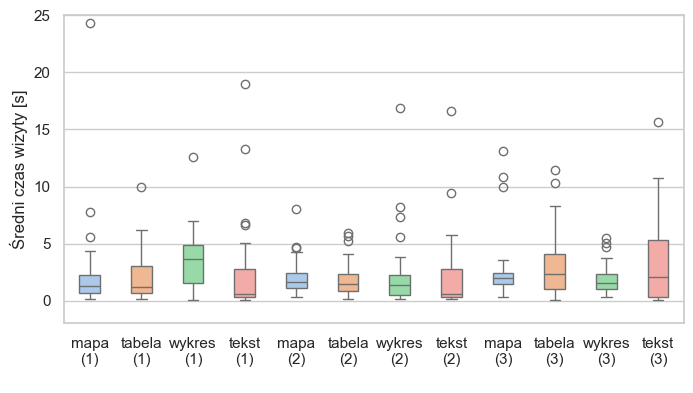

In [256]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
var = 'Avg'
typee = 'visit'

value_vars=[f'{var}_{typee}_1', f'{var}_{typee}_2', f'{var}_{typee}_3']
for val in value_vars:
    df[val] = df[val]/1000

df_new = pd.DataFrame()

# Concatenate values based on 'Group'
for i, col in enumerate(value_vars):
    df_new[f'{i+1}map_{var}_{typee}'] = df[col][df['Group'] == 'mapa'].values
    df_new[f'{i+1}tab_{var}_{typee}'] = df[col][df['Group'] == 'tabela'].values
    df_new[f'{i+1}plt_{var}_{typee}'] = df[col][df['Group'] == 'wykres'].values
    df_new[f'{i+1}txt_{var}_{typee}'] = df[col][df['Group'] == 'tekst'].values


df_long = pd.melt(df_new, value_vars=[f'{1}map_{var}_{typee}', f'{1}tab_{var}_{typee}', f'{1}plt_{var}_{typee}', f'{1}txt_{var}_{typee}', f'{2}map_{var}_{typee}', f'{2}tab_{var}_{typee}', f'{2}plt_{var}_{typee}', f'{2}txt_{var}_{typee}', f'{3}map_{var}_{typee}', f'{3}tab_{var}_{typee}', f'{3}plt_{var}_{typee}', f'{3}txt_{var}_{typee}'],
                  var_name='Pair', value_name='Value')

# Generate boxplot
colors = sns.color_palette('pastel', n_colors=4)
hue_order = [f'{1}map_{var}_{typee}', f'{1}tab_{var}_{typee}', f'{1}plt_{var}_{typee}', f'{1}txt_{var}_{typee}', f'{2}map_{var}_{typee}', f'{2}tab_{var}_{typee}', f'{2}plt_{var}_{typee}', f'{2}txt_{var}_{typee}', f'{3}map_{var}_{typee}', f'{3}tab_{var}_{typee}', f'{3}plt_{var}_{typee}', f'{3}txt_{var}_{typee}']

labels = ['mapa\n(1)', 'tabela\n(1)', 'wykres\n(1)', 'tekst\n(1)', 'mapa\n(2)\n', 'tabela\n(2)', 'wykres\n(2)', 'tekst\n(2)\n', 'mapa\n(3)', 'tabela\n(3)', 'wykres\n(3)\n', 'tekst\n(3)\n']

sns.set(style="whitegrid")
plt.figure(figsize=(8, 4))
ax = sns.boxplot(data=df_long, x='Pair', y='Value', hue='Pair', palette=colors, hue_order=hue_order, width=0.4)

# 1
# tabela vs tekst
# plt.annotate(
#     '', xy=(0.12, -0.2), xycoords='axes fraction', xytext=(0.3, -0.2),
#     textcoords='axes fraction', arrowprops=dict(arrowstyle="-", color="black"))
# plt.annotate('*', xy=(0.21, -0.23), xycoords='axes fraction', textcoords='axes fraction',
#              ha='center', va='bottom', fontsize=15)
# 
# # wykres vs tekst
# plt.annotate(
#     '', xy=(0.2, -0.24), xycoords='axes fraction', xytext=(0.3, -0.24),
#     textcoords='axes fraction', arrowprops=dict(arrowstyle="-", color="black"))
# plt.annotate('*', xy=(0.25, -0.27), xycoords='axes fraction', textcoords='axes fraction',
#              ha='center', va='bottom', fontsize=15)

#tabela vs wykres
# plt.annotate(
#     '', xy=(0.12, -0.32), xycoords='axes fraction', xytext=(0.21, -0.32),
#     textcoords='axes fraction', arrowprops=dict(arrowstyle="-", color="black"))
# plt.annotate('*', xy=(0.16, -0.35), xycoords='axes fraction', textcoords='axes fraction',
#              ha='center', va='bottom', fontsize=15)
# 
# # mapa vs tekst
# plt.annotate(
#     '', xy=(0.035, -0.2), xycoords='axes fraction', xytext=(0.3, -0.2),
#     textcoords='axes fraction', arrowprops=dict(arrowstyle="-", color="black"))
# plt.annotate('*', xy=(0.16, -0.23), xycoords='axes fraction', textcoords='axes fraction',
#              ha='center', va='bottom', fontsize=15)
# 
# # mapa vs tabela
# plt.annotate(
#     '', xy=(0.035, -0.24), xycoords='axes fraction', xytext=(0.13, -0.24),
#     textcoords='axes fraction', arrowprops=dict(arrowstyle="-", color="black"))
# plt.annotate('*', xy=(0.08, -0.27), xycoords='axes fraction', textcoords='axes fraction',
#              ha='center', va='bottom', fontsize=15)
# 
# 
# # 2
# # tabela vs tekst
# plt.annotate(
#     '', xy=(0.46, -0.24), xycoords='axes fraction', xytext=(0.63, -0.24),
#     textcoords='axes fraction', arrowprops=dict(arrowstyle="-", color="black"))
# plt.annotate('*', xy=(0.54, -0.27), xycoords='axes fraction', textcoords='axes fraction',
#              ha='center', va='bottom', fontsize=15)
# 
# # wykres vs tekst
# plt.annotate(
#     '', xy=(0.53, -0.32), xycoords='axes fraction', xytext=(0.63, -0.32),
#     textcoords='axes fraction', arrowprops=dict(arrowstyle="-", color="black"))
# plt.annotate('*', xy=(0.58, -0.35), xycoords='axes fraction', textcoords='axes fraction',
#              ha='center', va='bottom', fontsize=15)
# 
# # #tabela vs wykres
# # plt.annotate(
# #     '', xy=(0.12, -0.32), xycoords='axes fraction', xytext=(0.21, -0.32),
# #     textcoords='axes fraction', arrowprops=dict(arrowstyle="-", color="black"))
# # plt.annotate('*', xy=(0.16, -0.35), xycoords='axes fraction', textcoords='axes fraction',
# #              ha='center', va='bottom', fontsize=15)
# 
# # mapa vs tekst
# plt.annotate(
#     '', xy=(0.37, -0.2), xycoords='axes fraction', xytext=(0.63, -0.2),
#     textcoords='axes fraction', arrowprops=dict(arrowstyle="-", color="black"))
# plt.annotate('*', xy=(0.5, -0.23), xycoords='axes fraction', textcoords='axes fraction',
#              ha='center', va='bottom', fontsize=15)

# # mapa vs tabela
# plt.annotate(
#     '', xy=(0.37, -0.24), xycoords='axes fraction', xytext=(0.47, -0.24),
#     textcoords='axes fraction', arrowprops=dict(arrowstyle="-", color="black"))
# plt.annotate('*', xy=(0.42, -0.27), xycoords='axes fraction', textcoords='axes fraction',
#              ha='center', va='bottom', fontsize=15)
# 
# # mapa vs wykres
# plt.annotate(
#     '', xy=(0.37, -0.2), xycoords='axes fraction', xytext=(0.55, -0.2),
#     textcoords='axes fraction', arrowprops=dict(arrowstyle="-", color="black"))
# plt.annotate('*', xy=(0.46, -0.23), xycoords='axes fraction', textcoords='axes fraction',
#              ha='center', va='bottom', fontsize=15)
# 
# 
# # 3
# # tabela vs tekst
# plt.annotate(
#     '', xy=(0.79, -0.2), xycoords='axes fraction', xytext=(0.97, -0.2),
#     textcoords='axes fraction', arrowprops=dict(arrowstyle="-", color="black"))
# plt.annotate('*', xy=(0.88, -0.23), xycoords='axes fraction', textcoords='axes fraction',
#              ha='center', va='bottom', fontsize=15)
# 
# # wykres vs tekst
# plt.annotate(
#     '', xy=(0.88, -0.36), xycoords='axes fraction', xytext=(0.97, -0.36),
#     textcoords='axes fraction', arrowprops=dict(arrowstyle="-", color="black"))
# plt.annotate('*', xy=(0.92, -0.39), xycoords='axes fraction', textcoords='axes fraction',
#              ha='center', va='bottom', fontsize=15)
# 
# #tabela vs wykres
# plt.annotate(
#     '', xy=(0.79, -0.32), xycoords='axes fraction', xytext=(0.89, -0.32),
#     textcoords='axes fraction', arrowprops=dict(arrowstyle="-", color="black"))
# plt.annotate('*', xy=(0.84, -0.35), xycoords='axes fraction', textcoords='axes fraction',
#              ha='center', va='bottom', fontsize=15)
# 
# # mapa vs tekst
# plt.annotate(
#     '', xy=(0.7, -0.2), xycoords='axes fraction', xytext=(0.97, -0.2),
#     textcoords='axes fraction', arrowprops=dict(arrowstyle="-", color="black"))
# plt.annotate('*', xy=(0.84, -0.23), xycoords='axes fraction', textcoords='axes fraction',
#              ha='center', va='bottom', fontsize=15)

# mapa vs tabela
# plt.annotate(
#     '', xy=(0.035, -0.28), xycoords='axes fraction', xytext=(0.13, -0.28),
#     textcoords='axes fraction', arrowprops=dict(arrowstyle="-", color="black"))
# plt.annotate('*', xy=(0.08, -0.31), xycoords='axes fraction', textcoords='axes fraction',
#              ha='center', va='bottom', fontsize=15)

# mapa vs wykres
# plt.annotate(
#     '', xy=(0.7, -0.24), xycoords='axes fraction', xytext=(0.89, -0.24),
#     textcoords='axes fraction', arrowprops=dict(arrowstyle="-", color="black"))
# plt.annotate('*', xy=(0.795, -0.27), xycoords='axes fraction', textcoords='axes fraction',
#              ha='center', va='bottom', fontsize=15)

plt.xlabel('')
plt.ylim(-2, 25)
plt.xticks(rotation=0)
ax.set_xticklabels(labels)
plt.ylabel('Średni czas wizyty [s]')
plt.show()


In [249]:
# print(fixations)
# plots(df, fixations, 'fiksacji')

Podsumowanie:
Istotne statystycznie (fiksacje):

- Total_fix_1: tabela vs tekst, tekst vs wykres
- Avg_fix_1: słabo się różnicuje
- Num_fix_1: tabela vs tekst, tekst vs wykres
- Avg_fix_2: mapa vs tekst, tabela vs tekst
- Avg_fix_3: tabela vs tekst
- Num_fix_3: słabo się różnicuje
- Sum_Avg_fix: mapa vs tekst, tabela vs tekst, tabela vs wykres, tekst vs wykres
- Avg_Avg_fix: mapa vs tekst, tabela vs tekst, tabela vs wykres, tekst vs wykres

In [250]:
# średnia wielkość źrenicy
test(df, ['Avg_AvgPupil'], flag=False) # testujemy tylko średnią - inne nie mają znaczenia

#################################
Avg_AvgPupil
        F Value  Num DF  Den DF    Pr > F
Group  0.889447     3.0   117.0  0.448863
-------------------
Zmienna: Group, P-value: 0.4488632651
Brak podstaw do odrzucenia H0.


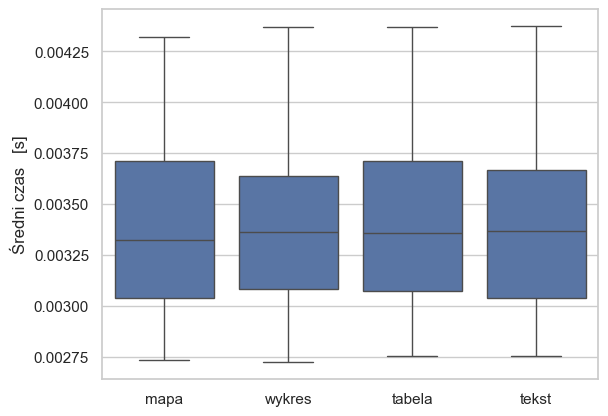

In [251]:
plots(df, ['Avg_AvgPupil'])

In [252]:
# wizyty
test(df, visits)

#################################
Total_visit_1
        F Value  Num DF  Den DF    Pr > F
Group  3.866321     3.0   117.0  0.011166
-------------------
Zmienna: Group, P-value: 0.0111656340
Istnieją podstawy do odrzucenia H0, przyjmujemy hipotezę H1.
#################################
Avg_visit_1
        F Value  Num DF  Den DF    Pr > F
Group  1.053147     3.0   117.0  0.371898
-------------------
Zmienna: Group, P-value: 0.3718975634
Brak podstaw do odrzucenia H0.
#################################
Num_visit_1
         F Value  Num DF  Den DF        Pr > F
Group  23.709747     3.0   117.0  4.641525e-12
-------------------
Zmienna: Group, P-value: 0.0000000000
Istnieją podstawy do odrzucenia H0, przyjmujemy hipotezę H1.
#################################
Total_visit_2
        F Value  Num DF  Den DF    Pr > F
Group  2.302248     3.0   117.0  0.080699
-------------------
Zmienna: Group, P-value: 0.0806985690
Brak podstaw do odrzucenia H0.
#################################
Avg_visit_2
    

In [253]:
posthoc_tests(df, ['Total_visit_1', 'Num_visit_1', 'Num_visit_2', 'Total_visit_3', 'Num_visit_3', 'Sum_Num_visit', 'Avg_Num_visit'])

#################################
Total_visit_1
-----------------------
Groups: mapa vs tabela
P-value: 0.3950469246847968
Brak podstaw do odrzucenia H0.
-----------------------
Groups: mapa vs tekst
P-value: 0.38764684924351195
Brak podstaw do odrzucenia H0.
-----------------------
Groups: mapa vs wykres
P-value: 0.7302470580916633
Brak podstaw do odrzucenia H0.
-----------------------
Groups: tabela vs tekst
P-value: 0.013956875231309876
Istnieją podstawy do odrzucenia H0, przyjmujemy hipotezę H1.
-----------------------
Groups: tabela vs wykres
P-value: 0.7302470580916633
Brak podstaw do odrzucenia H0.
-----------------------
Groups: tekst vs wykres
P-value: 0.004948047840629065
Istnieją podstawy do odrzucenia H0, przyjmujemy hipotezę H1.
#################################
Num_visit_1
-----------------------
Groups: mapa vs tabela
P-value: 0.0014443159557107343
Istnieją podstawy do odrzucenia H0, przyjmujemy hipotezę H1.
-----------------------
Groups: mapa vs tekst
P-value: 0.000155

Index(['Total_visit_1', 'Avg_visit_1', 'Num_visit_1', 'Total_visit_2',
       'Avg_visit_2', 'Num_visit_2', 'Total_visit_3', 'Avg_visit_3',
       'Num_visit_3', 'Sum_Total_visit', 'Avg_Total_visit', 'Sum_Avg_visit',
       'Avg_Avg_visit', 'Sum_Num_visit', 'Avg_Num_visit'],
      dtype='object')


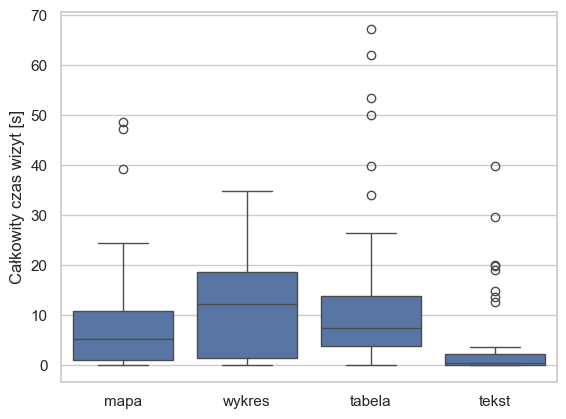

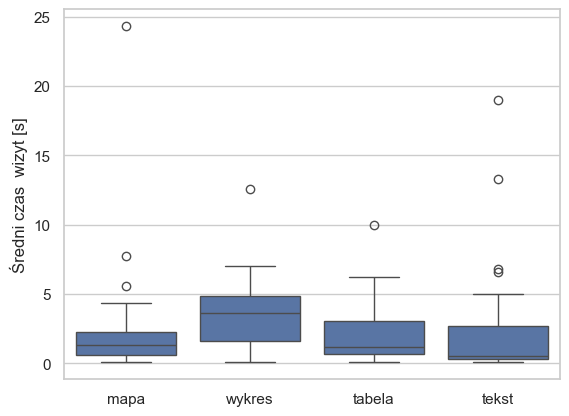

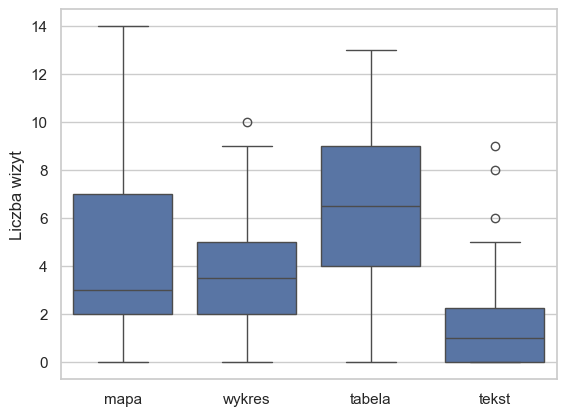

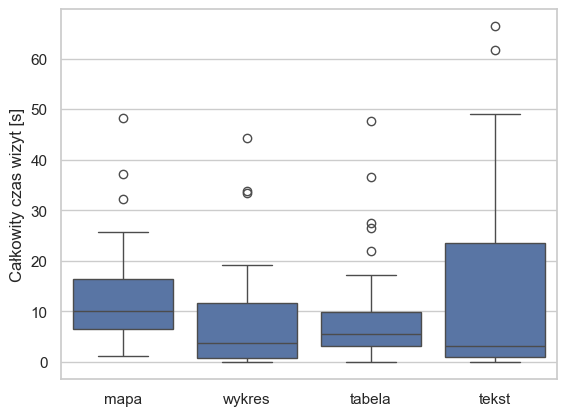

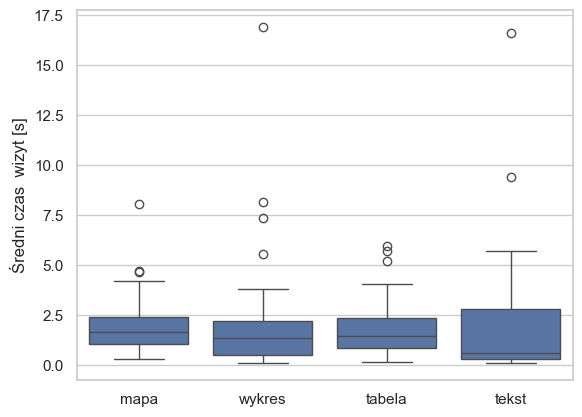

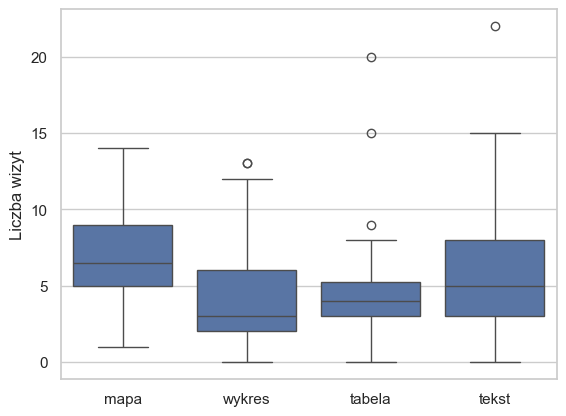

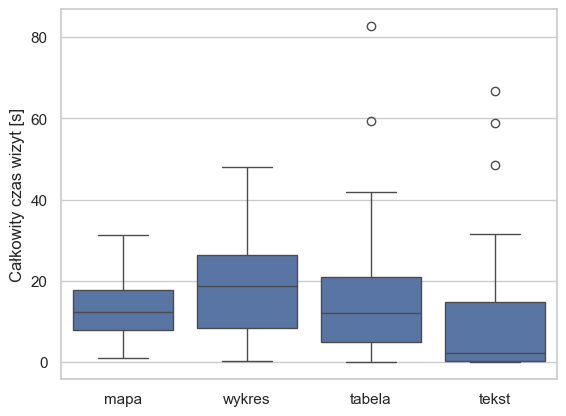

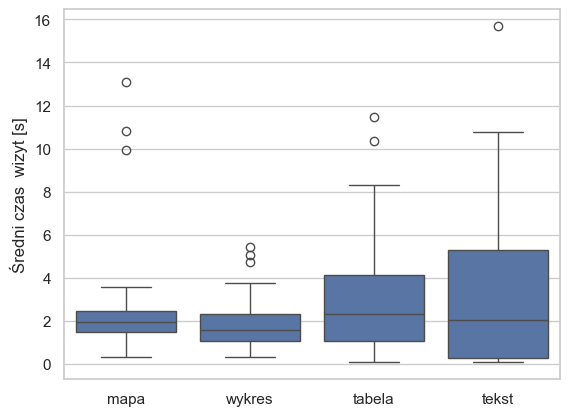

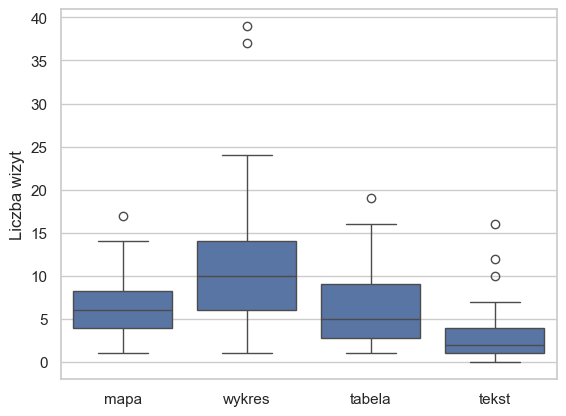

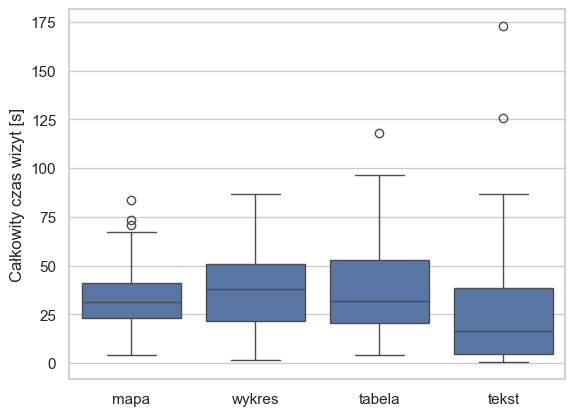

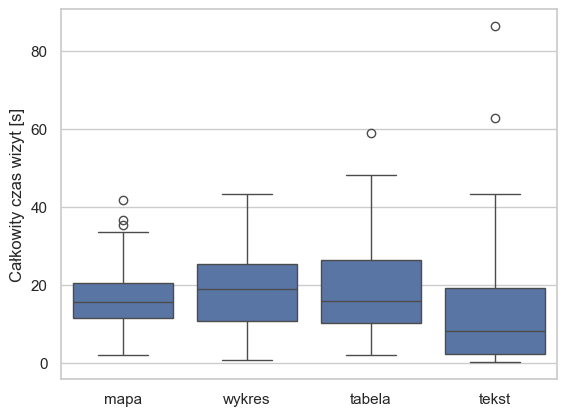

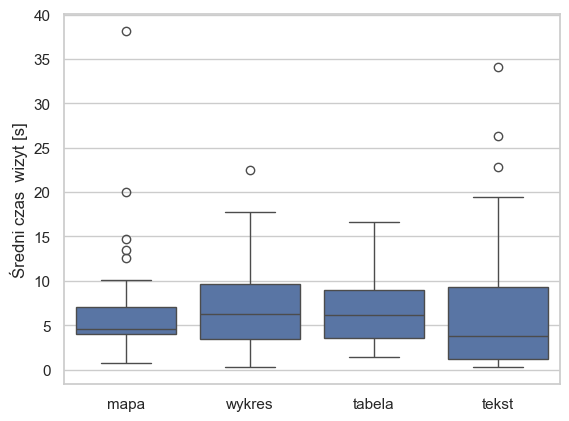

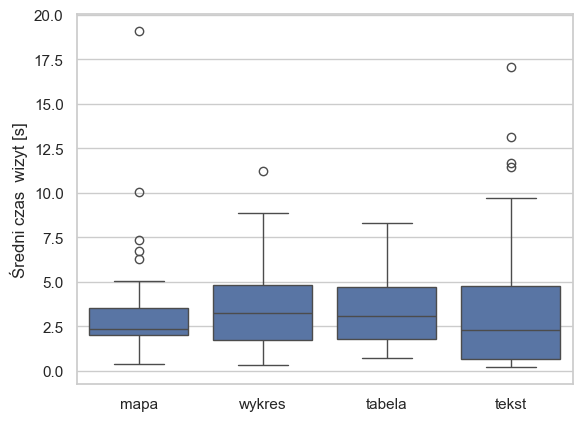

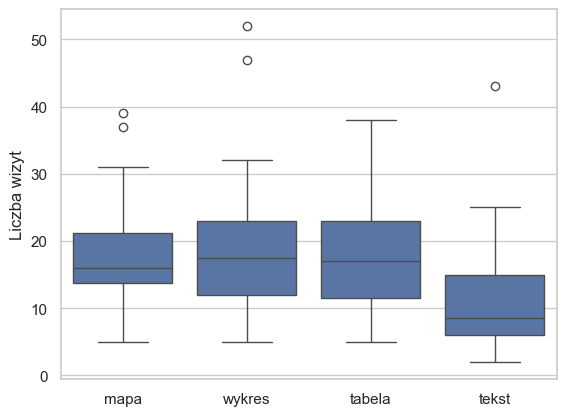

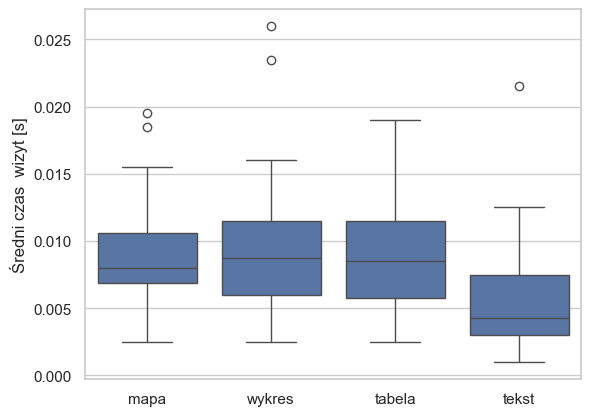

In [254]:
print(visits)
plots(df, visits, 'wizyt')

Podsumowanie:

Wizyty: istotne statystycznie: 
- total_visit_1: tabela vs tekst, tekst vs wykres
- num_visit_1: mapa vs tabela, mapa vs tekst, tabela vs tekst, tabela vs wykres, tekst vs wykres
- num_visit_2: mapa vs tabela, mapa vs wykres, tabela vs tekst, tekst vs wykres
- total_visit_3: słabo się różnicuje
- num_visit_3: mapa vs tekst, mapa vs wykres, tabela vs tekst, tabela vs wykres, tekst vs wykres
- Sum_num_visit: mapa vs tekst, tabela vs tekst, tekst vs wykres
- Avg_num_visit: mapa vs tekst, tabela vs tekst, tekst vs wykres

In [255]:
import csv
with open('./results/mapa_wykres_tabela_tekst.csv', 'w', newline='') as csvfile:
    writer = csv.writer(csvfile)
    row = []
    for item in results:
        if item != '\n':
            row.append(item)
        else:
            writer.writerow(row)
            row = []
    if row:  # Sprawdzamy, czy jest coś do zapisania w ostatnim wierszu
        writer.writerow(row)